In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

# Matplotlib Inline für Jupyter Notebooks
%matplotlib inline

# Laden des Amazon UK Produktdatensatzes
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")



In [13]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

## Part 1: Analyzing Best-Seller Trends Across Product Categories

Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

In [14]:
# Erstellen einer Kreuztabelle
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
print(crosstab_result)

isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [15]:
print(best_seller_proportion.columns)

Index([False, True], dtype='bool', name='isBestSeller')


In [16]:
best_seller_proportion_sorted = best_seller_proportion.sort_values(by=True, ascending=False)
print(best_seller_proportion_sorted)

isBestSeller                         False     True 
category                                            
Grocery                           0.941865  0.058135
Smart Home Security & Lighting    0.942308  0.057692
Health & Personal Care            0.942314  0.057686
Mobile Phone Accessories          0.957529  0.042471
Power & Hand Tools                0.964661  0.035339
...                                    ...       ...
CD, Disc & Tape Players           1.000000  0.000000
General Music-Making Accessories  1.000000  0.000000
Snowboard Boots                   1.000000  0.000000
Boxes & Organisers                1.000000  0.000000
eBook Readers & Accessories       1.000000  0.000000

[296 rows x 2 columns]


In [17]:
# Erstellen einer Kreuztabelle
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
print(crosstab_result)


isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [18]:
# Berechnen des Anteils der Bestseller für jede Kategorie
best_seller_proportion = (crosstab_result.T / crosstab_result.T.sum()).T
print(best_seller_proportion.columns)  # Überprüfen der Spaltennamen

Index([False, True], dtype='bool', name='isBestSeller')


In [19]:
# Sortieren nach der Spalte, die den Anteil der Bestseller darstellt (wahrscheinlich True)
best_seller_proportion_sorted = best_seller_proportion.sort_values(by=True, ascending=False)
print(best_seller_proportion_sorted)

isBestSeller                         False     True 
category                                            
Grocery                           0.941865  0.058135
Smart Home Security & Lighting    0.942308  0.057692
Health & Personal Care            0.942314  0.057686
Mobile Phone Accessories          0.957529  0.042471
Power & Hand Tools                0.964661  0.035339
...                                    ...       ...
CD, Disc & Tape Players           1.000000  0.000000
General Music-Making Accessories  1.000000  0.000000
Snowboard Boots                   1.000000  0.000000
Boxes & Organisers                1.000000  0.000000
eBook Readers & Accessories       1.000000  0.000000

[296 rows x 2 columns]


In [20]:
# Chi-Quadrat-Test
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)
print(f"Chi-Quadrat-Statistik: {chi2_statistic}, p-Wert: {chi2_p_value}")

Chi-Quadrat-Statistik: 36540.20270061387, p-Wert: 0.0


In [21]:
# Cramér's V
cramers_v = association(crosstab_result, method="cramer")
print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.1222829439760564


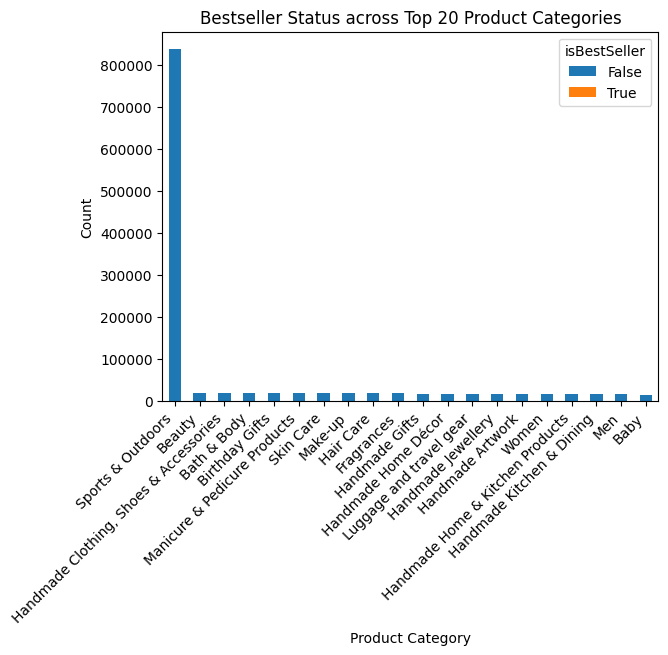

In [23]:
# Visualisierung: Gestapeltes Balkendiagramm für die Top 20 Kategorien
top_20_categories = crosstab_result.sum(axis=1).sort_values(ascending=False).head(20).index
crosstab_top_20 = crosstab_result.loc[top_20_categories]

crosstab_top_20.plot(kind="bar", stacked=True)
plt.title('Bestseller Status across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands
## Objective: Investigate how different product categories influence product prices.

## Preliminary Step: Remove outliers in product prices.

In [24]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]


Violin Plots:

Visualisieren der Preisverteilung über verschiedene Produktkategorien.

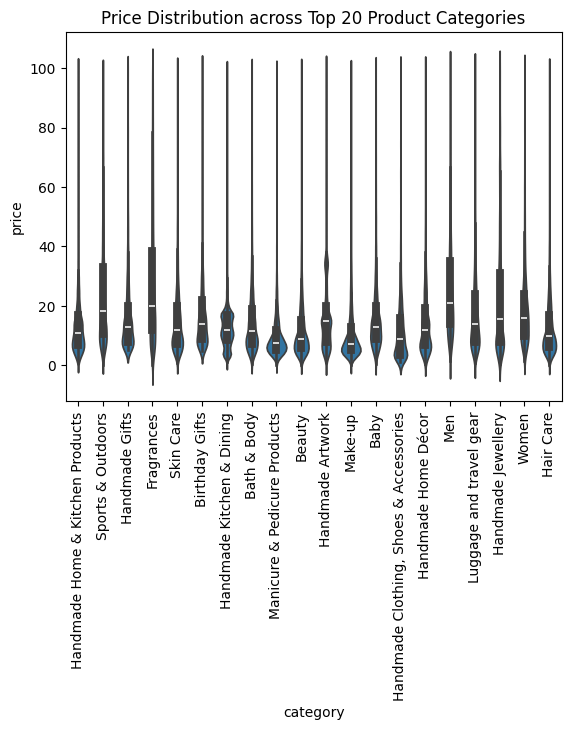

In [25]:
top_categories = df_no_outliers['category'].value_counts().head(20).index
sns.violinplot(data=df_no_outliers[df_no_outliers['category'].isin(top_categories)], x='category', y='price')
plt.xticks(rotation=90)
plt.title('Price Distribution across Top 20 Product Categories')
plt.show()


Balkendiagramme:

Vergleich des durchschnittlichen Preises von Produkten für die Top 10 Produktkategorien (basierend auf Anzahl).

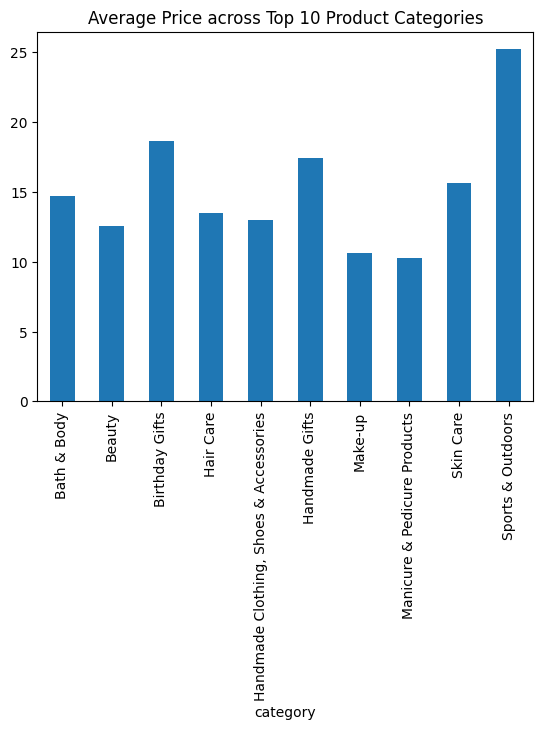

In [26]:
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
avg_prices = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)].groupby('category')['price'].mean()
avg_prices.plot(kind='bar')
plt.title('Average Price across Top 10 Product Categories')
plt.show()


Box Plots:

Visualisieren der Produktbewertungen basierend auf deren Kategorien.

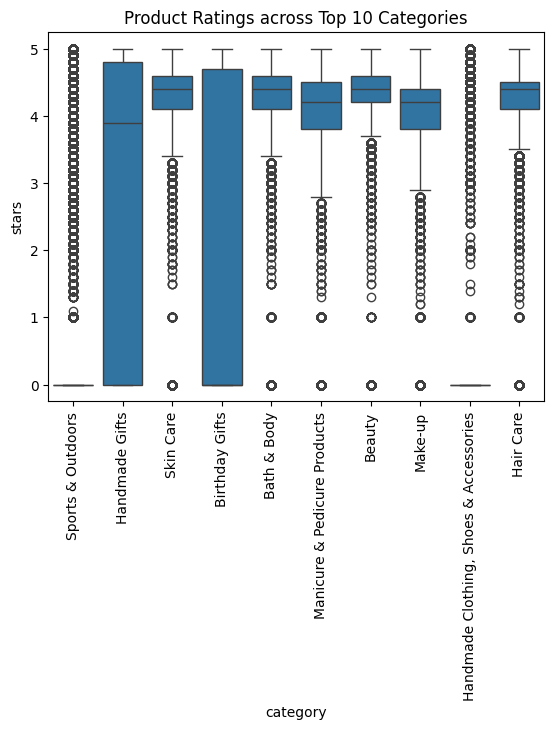

In [27]:
sns.boxplot(data=df_no_outliers[df_no_outliers['category'].isin(top_10_categories)], x='category', y='stars')
plt.xticks(rotation=90)
plt.title('Product Ratings across Top 10 Categories')
plt.show()


## Teil 3: Untersuchung des Zusammenspiels zwischen Produktpreisen und Bewertungen 
## Ziel: Analysieren, wie Produktbewertungen mit Produktpreisen korrelieren.
## Part 3: Investigating the Interplay Between Product Prices and Ratings
## Objective: Analyze how product ratings (stars) correlate with product prices.

Korrelationskoeffizienten:

Berechnen des Korrelationskoeffizienten zwischen Preis und Bewertungen.

In [28]:
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])
print(f"Korrelationskoeffizient: {correlation}")


Korrelationskoeffizient: -0.07767299878181352


Visualisierungen:

Scatterplot zur Visualisierung der Beziehung zwischen Produktbewertung und Preis.

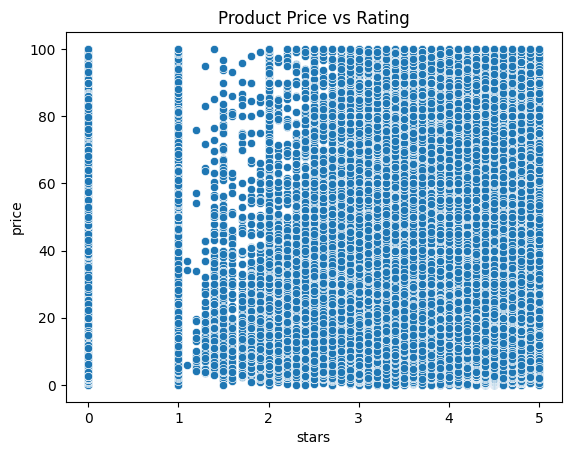

In [29]:
sns.scatterplot(data=df_no_outliers, x='stars', y='price')
plt.title('Product Price vs Rating')
plt.show()


Korrelations-Heatmap zur Visualisierung der Korrelationen zwischen allen numerischen Variablen.

In [31]:
numeric_columns = df_no_outliers.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()


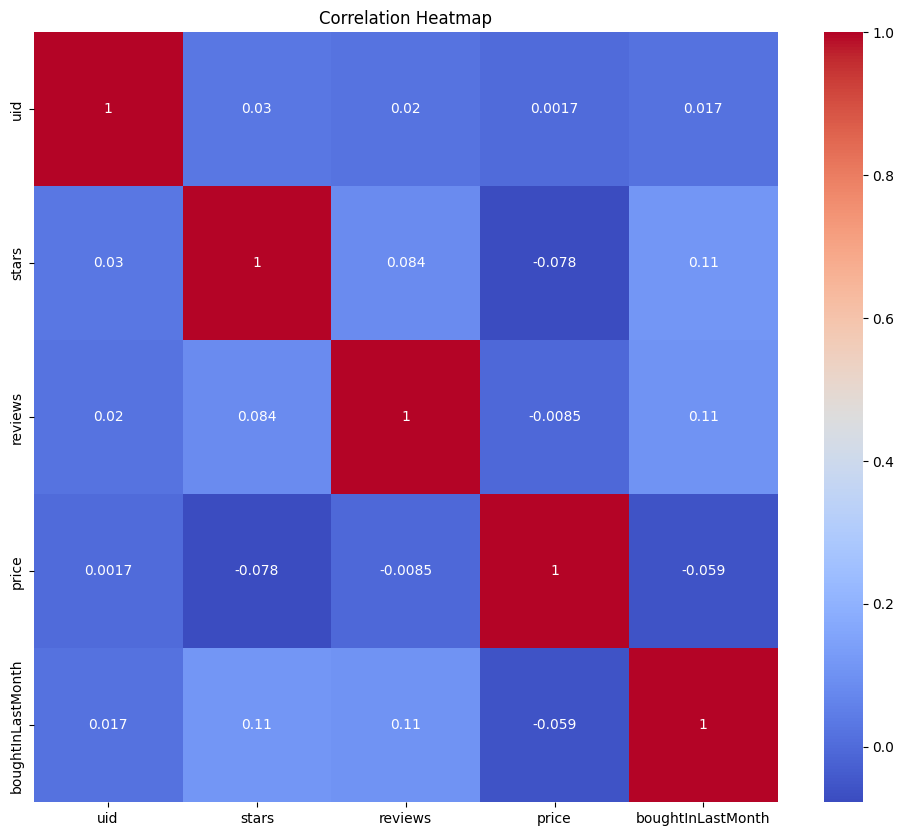

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

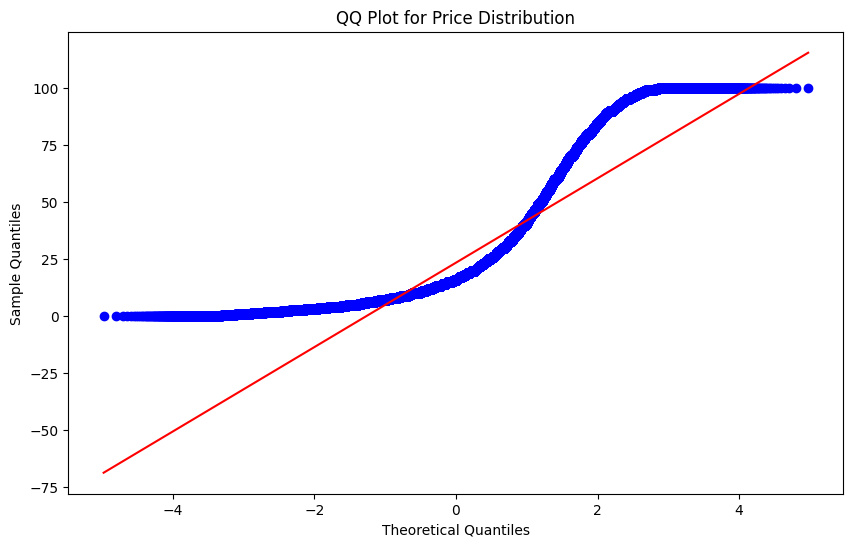

In [35]:
# QQ-Plot für Preisverteilung
import scipy.stats as stats

# QQ-Plot für Preisverteilung
plt.figure(figsize=(10, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Price Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()